<a href="https://colab.research.google.com/github/Gllitch404/AlEstIITrab2/blob/main/AlEstII(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from getpass import getpass

# Insira o token quando solicitado
token = getpass('Insira seu token de acesso do GitHub: ')

# Clone com autenticação via token (não expõe o token no código)
!git clone https://{token}@github.com/Gllitch404/AlEstIITrab2.git

Insira seu token de acesso do GitHub: ··········
Cloning into 'AlEstIITrab2'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 2.02 MiB | 7.14 MiB/s, done.
Resolving deltas: 100% (3/3), done.


A seguir o enuciado e a resolução do segundo trabalho de Algortimo e Estrutura de dados II. Ao final foi adicionado um relatório de uso rapido para facil vizualização quanto a resolução proposta e algumas observações.


# Os fenícios estão chegando
###### enunciado
---


Você sabe que os fenícios foram grandes navegadores e comerciantes que percorriam os mares Egeu, Adriático e Mediterrâneo levando produtos entre nações. O que você não sabe é que eles estão se preparando para voltar a viajar e desta vez estão dispostos a usar todas as tecnologias modernas para encurtar suas viagens, reduzir sua pegada climática e (é claro) aumentar seus lucros.

Para fazer tudo isso eles contrataram… você! Eles planejam cada uma das suas viagens saindo do porto 1 e passando por todos os outros portos de 2 a 9 nesta ordem, mas precisam saber o tamanho do trajeto total para poder ir com o mínimo de combustível possível e ainda voltar para casa depois do último porto. Então sua missão é calcular quanto combustível é necessário, levando em conta os detalhes a seguir:

* As trirremes fenícias se movem apenas nas direções Norte, Sul, Leste e Oeste;
* Cada movimento usa uma unidade de combustível;
* Os portos de 1 a 9 estão marcados… bom… por 1 a 9;
* Nos mapas fenícios o ponto significa um trecho de água navegável e o asterisco significa algo não-navegável (terra, rochedos, deserto, pântano, abismo, rio de lava, etc);
* Às vezes, devido a erros dos cartógrafos locais, um porto foi colocado fora de lugar e não pode ser visitado. Neste caso sua missão é pular este “porto” e tentar o seguinte ou navegar para casa se este for o último porto.
---





Você deve receber os casos de teste feitos pelos cartógrafos e resolver o problema de achar o mínimo de combustível para fazer as viagens em cada um deles. Ao final você deve apresentar um relatório descrevendo:

1. Qual o problema sendo resolvido;

2. Como o problema foi modelado;

3. Como é o processo de solução, apresentando exemplos e algoritmos;

4. Os resultados dos casos de teste;

5. Conclusões.

Exemplo de mapa:

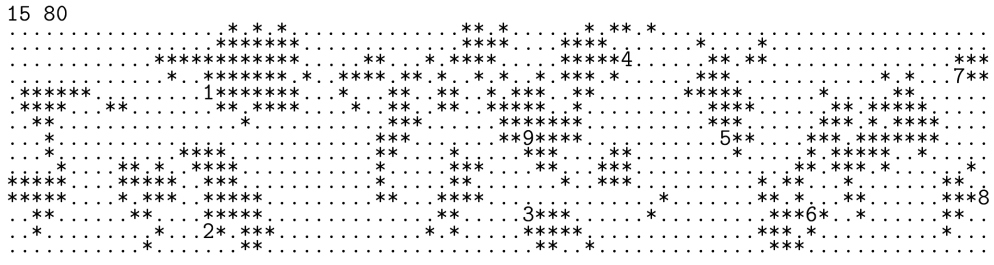

Criadas as classes Edge e Graph com o intuito de estruturar os dados dos mapas dos fenícios

In [ ]:
class Edge:
  def __init__(self, frt_vertex, scd_vertex):
    if frt_vertex != scd_vertex:
      self.frt_vertex = frt_vertex
      self.scd_vertex = scd_vertex
      self.weight = 1
    else:
      self.frt_vertex = frt_vertex
      self.scd_vertex = frt_vertex
      self.weight = 0
  def __repr__(self):
    return f"{self.frt_vertex} -> {self.scd_vertex}"

In [ ]:
class Graph:
  def __init__(self, num_vertices):
    self.num_vertices = num_vertices
    self.adj_list = [[] for _ in range(num_vertices)]
    self.hold = [''for _ in range(num_vertices)]

  def set_hold(self, vertex, value):
    self.hold[vertex] = value

  def get_hold(self, vertex):
    return self.hold[vertex]

  def add_edge(self, frt_vertex, scd_vertex):
    if frt_vertex == scd_vertex:
      return
    self.adj_list[frt_vertex].append(Edge(frt_vertex, scd_vertex))
    self.adj_list[scd_vertex].append(Edge(scd_vertex, frt_vertex))

A classe PriorityQueue é uma fila com prioridade especializada no problema em questão, essa implementação permite que a prioridade mude enquanto esta sendo usada.

In [ ]:
import heapq
class MinPriorityQueue:
  def __init__(self):
    self.queue = []
    self.entry_finder = {}
    self.counter = 0
  def push(self, item, priority):
    if item in self.entry_finder:
      self.remove(item)
    self.entry_finder[item] = [priority, self.counter, item]
    heapq.heappush(self.queue, self.entry_finder[item])
    self.counter += 1
  def remove(self, item):
    if item in self.entry_finder:
      del self.entry_finder[item]
      return
  def pop(self):
    while self.queue:
      priority, count, item = heapq.heappop(self.queue)
      if item in self.entry_finder:
        del self.entry_finder[item]
        return item
  def decrease_key(self, item, new_priority):
    self.push(item, new_priority)

  def contains(self, item):
    return item in self.entry_finder

  def is_empty(self):
    return not self.entry_finder

A implementação para descobrir o caminho minimo utiliza o algortimo de Dijkstra será usado para encontrar o caminho entre os portos.

In [ ]:
class Dijkstra: # Chore Dijkstra voce virou uma classe
  def relax(self, edge):
    v = edge.frt_vertex
    w = edge.scd_vertex
    if self.distTo[w] > self.distTo[v] + edge.weight:
      self.distTo[w] = self.distTo[v] + edge.weight
      self.edgeTo[w] = edge
      if self.pq.contains(w):
        self.pq.decrease_key(w, self.distTo[w])
      else:
        self.pq.push(w, self.distTo[w])
  def __init__(self, graph, start_vertex):
    self.graph = graph
    self.start_vertex = start_vertex

    self.edgeTo = [[] for _ in range(graph.num_vertices)]
    self.distTo = [float('inf') for _ in range(graph.num_vertices)]
    self.distTo[start_vertex] = 0
    self.pq = MinPriorityQueue()
    self.pq.push(start_vertex, 0)


    while not self.pq.is_empty():
      v = self.pq.pop()
      for edge in graph.adj_list[v]:
        self.relax(edge)

A forma como nos é dado os mapas é através de um arquivo de texto logo, devemos implementar alguma forma de colocar os dados desse texto(mapa) na nossa estrutura de dados. Este algoritimo tambem é especializado para este problema. Ele percorre todo o testo até encontra o porto '1' e inicia uma BFS apartir da li oque faz apenas os portos e casas alcançaveis pelo 1 serem registradas no grafo.

In [ ]:
from collections import deque

def import_grafo(filename):
    with open(filename, "r") as file: # Aquiu ele abre o arquivo separa as cols e rows e o mapa
        lines = file.readlines()
        num_vertices = lines[0].strip().split(" ")
        rows = int(num_vertices[0])
        cols = int(num_vertices[1])

        mapa = [list(line.strip()) for line in lines[1:]]
        grafo = Graph(rows * cols)

        # Encontra a posição do porto 1
        for i in range(rows):
            for j in range(cols):
                if mapa[i][j] == "1":
                    inicio = (i, j)
                    break

        # Começa o BFS (Não precisamos das partes que não se conectam com o porto 1)
        visitado = [[False for _ in range(cols)] for _ in range(rows)]
        fila = deque()
        fila.append(inicio)

        while fila:
            x, y = fila.popleft()
            if visitado[x][y]:
                continue
            visitado[x][y] = True

            idx = x * cols + y
            grafo.set_hold(idx, mapa[x][y])

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols:
                    if mapa[nx][ny] != "*" and not visitado[nx][ny]:
                        fila.append((nx, ny))
                    if mapa[nx][ny] != "*":
                        grafo.add_edge(idx, nx * cols + ny)

    return grafo

Facilitadores e Apresentadores

In [ ]:
def printar_caminho_minimo(grafo, origem, destino, modo): # Modo = |key|     result     |
    dijkstra = Dijkstra(grafo, origem)                    #        | p |      print     |
    caminho = []                                          #        | r |     return     |
                                                          #        | p+|print and return|
    v = destino                                           # Ele printa mas ainda retorna os index dos nodos visitados na ordem de como foram visitados
    if dijkstra.distTo[v] == float('inf'):
        print(f"Sem caminho de {origem} para {destino}")
        return []
    count = 0
    while v != origem:
        caminho.append(v)
        v = dijkstra.edgeTo[v].frt_vertex
        count += 1
    caminho.append(origem)
    caminho.reverse()
    rtn = []
    rtn.append(count)
    rtn.append(caminho)

    if modo[0] in 'p':
      print("A gasolina gasta para ir do porto "+ grafo.hold[origem] + " para o porto " + grafo.hold[destino] + " é: " + str(count))
      print("E o caminho para chegar lá é:")
      print(" -> ".join(str(n) for n in caminho))
    if modo[-1] in 'r+':
      return rtn
    return

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def desenhar_grafo(grafo, linhas, colunas, caminhos=[]):
    G = nx.Graph()

    # Monta o grafo com todas as arestas
    for v in range(grafo.num_vertices):
        for edge in grafo.adj_list[v]:
            G.add_edge(edge.frt_vertex, edge.scd_vertex)

    escala = 2.5
    pos = {i: ((i % colunas) * escala, (-i // colunas) * escala)
           for i in range(grafo.num_vertices) if grafo.adj_list[i]}

    labels = {i: f"{i} ({grafo.hold[i]})" for i in G.nodes()}

    # Junta todas as arestas dos caminhos
    todas_as_arestas = set()
    todos_os_nos_do_caminho = set()

    for caminho in caminhos:
        if caminho:
            arestas = list(zip(caminho[:-1], caminho[1:]))
            todas_as_arestas.update(arestas)
            todos_os_nos_do_caminho.update(caminho)

    # Define cor de cada nó
    node_colors = []
    for i in G.nodes():
        if i in todos_os_nos_do_caminho and not grafo.hold[i] in '123456789':
            node_colors.append('orange')  # nós do caminho
        elif grafo.hold[i] in '123456789':
            node_colors.append('lightgreen')  # portos
        else:
            node_colors.append('lightblue')  # normais

    plt.figure(figsize=(colunas / 2, linhas / 2))
    plt.axis('equal')
    plt.title("Grafo com Caminho Mínimo Destacado")

    # Desenha nós
    nx.draw(G, pos, with_labels=False, node_size=100, node_color=node_colors)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=4)

    # Desenha todas as arestas em preto
    nx.draw_networkx_edges(G, pos, edge_color='black', width=0.5)

    # Desenha caminho mínimo em vermelho
    if todas_as_arestas:
        nx.draw_networkx_edges(
            G, pos,
            edgelist=list(todas_as_arestas),
            edge_color='red',
            width=2
        )

    plt.savefig("grafo_com_caminho.png", dpi=600, bbox_inches='tight')
    plt.show()


In [ ]:
def desenho(arquivo):
    # Criar grafo com 5 vértices
    with open(arquivo, "r") as file:
        lines = file.readlines()
        num_vertices = lines[0].strip().split(" ")
        rows = int( num_vertices[0])
        cols = int( num_vertices[1])
    grafo = import_grafo(arquivo)

    portos = {}
    for i in range(grafo.num_vertices):
      dado = grafo.hold[i]
      if isinstance(dado, str) and dado in '123456789' and dado.isdigit():
        portos[int(dado)] = i

    portos = [portos[i] for i in sorted(portos.keys())]
    portos.append(portos[1])

    all_caminhos = []
    for i in range(len(portos) - 1):
      all_caminhos.append(printar_caminho_minimo(grafo, portos[i], portos[i + 1],'r')[1])
    desenhar_grafo(grafo, rows, cols, all_caminhos)
    return

In [ ]:
def teste(arquivo,modo):             #|key|result|
    # Criar grafo com 5 vértices      | p | print|
    with open(arquivo, "r") as file: #| r |result|
        lines = file.readlines()
        num_vertices = lines[0].strip().split(" ")
        rows = int( num_vertices[0])
        cols = int( num_vertices[1])
    grafo = import_grafo(arquivo)


    # Mostrar o grafo
    #print("Grafo:")
    #print(grafo)

    # Rodar Dijkstra a partir do vértice 0

    portos = {} # Procura o indice dos portos
    for i in range(grafo.num_vertices):
      dado = grafo.hold[i]
      if isinstance(dado, str) and dado in '123456789' and dado.isdigit():
        portos[int(dado)] = i
    if(modo=='p'):
      print({k: portos[k] for k in sorted(portos)})


    # Ordena os portos por ordem crescente
    ordem_portos = [portos[i] for i in sorted(portos.keys())]



    ordem_portos.append(portos[1])  # voltar para o 1 no final
    portos = ordem_portos
    combustivel_total = 0
    all_caminhos = [] # Crie uma lista para armazenar todos os caminhos
    for i in range(len(portos) - 1):
      rtn = printar_caminho_minimo(grafo, portos[i], portos[i + 1],'r')
      caminho = rtn[1]
      all_caminhos.append(caminho) # Adicione cada caminho à lista
      combustivel_total += rtn[0]
    if(modo=='p'):
      print("O combustivel total para essa viagem será de "+str(combustivel_total))
    return

Plotagem de graficos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotBarra(EixoX, Eixoy):
  # Casos/testes (nomes ou identificadores)
  casos = EixoX

  # Tempos de execução em segundos
  tempos = Eixoy

  # Criação do gráfico de barras
  plt.bar(casos, tempos)

  # Rótulos e título
  plt.xlabel("Arquivos")
  plt.ylabel("Tempo de execução (s)")
  plt.title("Tempo de Execução")

  # Exibe o gráfico
  plt.savefig("plotBarra.png")
  plt.show()
def plotCurvaT(EixoX, EixoY):
    # Exemplo de dados
    x = np.array([10, 100, 1000, 10000, 100000, 1000000])
    y = np.array([0.0001, 0.001, 0.02, 0.2, 5, 60])  # tempo em segundos

    # Curvas teóricas para comparação
    y_linear = x
    y_quadrado = x**2
    y_nlogn = x * np.log2(x)

    # Plot real
    plt.plot(x, y, marker='o', label="Tempo real", color='blue')

    # Curvas teóricas
    plt.plot(x, y_linear / 1e5, '--', label="O(n)")       # normalizado para caber
    plt.plot(x, y_nlogn / 1e6, '--', label="O(n log n)")
    plt.plot(x, y_quadrado / 1e8, '--', label="O(n²)")

    # Escala logarítmica
    plt.xscale("log")
    plt.yscale("log")

    # Títulos e legendas
    plt.xlabel("Tamanho da matriz (n)")
    plt.ylabel("Tempo de execução (s)")
    plt.title("Analise empírica da complexidade")
    plt.legend()
    plt.grid(False)
    plt.savefig("plotCurvaT.png")
    plt.show()

def plot_taxa_crescimento(x, y):
    """
    Plota a taxa de crescimento empírica: Δy / Δx

    Parâmetros:
    - x: tamanhos da matriz
    - y: tempos de execução
    """
    x = np.array(x)
    y = np.array(y)

    delta_tempo = np.diff(y)
    delta_tamanho = np.diff(x)
    taxa_crescimento = delta_tempo / delta_tamanho

    plt.figure(figsize=(6, 5))
    plt.plot(x[1:], taxa_crescimento, marker='o', color='green')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Tamanho da matriz (n)")
    plt.ylabel("ΔTempo / ΔTamanho")
    plt.title("Taxa de Crescimento Empírica")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("taxacrescimento.png")
    plt.show()

def plot_tempo_por_elemento(x, y):
    """
    Plota o tempo médio por elemento: y / x

    Parâmetros:
    - x: tamanhos da matriz
    - y: tempos de execução
    """
    x = np.array(x)
    y = np.array(y)

    tempo_por_elemento = y / x

    plt.figure(figsize=(6, 5))
    plt.plot(x, tempo_por_elemento, marker='o', color='blue')
    plt.xscale("log")
    plt.xlabel("Tamanho da matriz (n)")
    plt.ylabel("Tempo por elemento (s/n)")
    plt.title("Tempo médio por elemento")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("tempopelemento.png")
    plt.show()

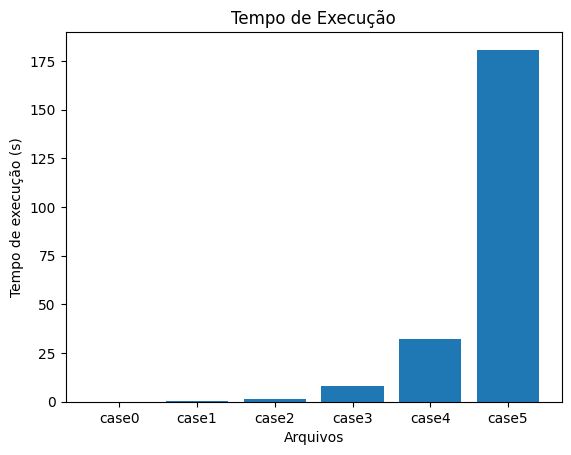

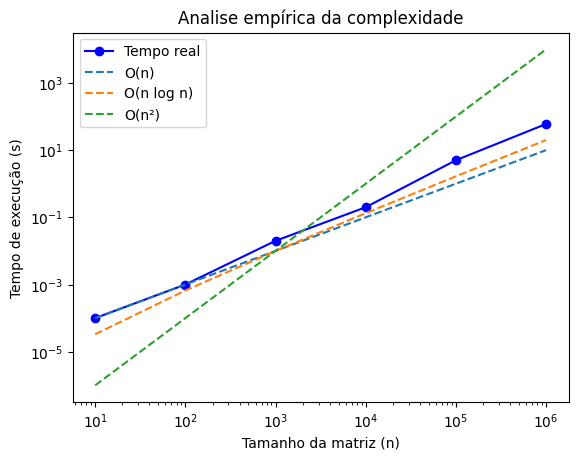

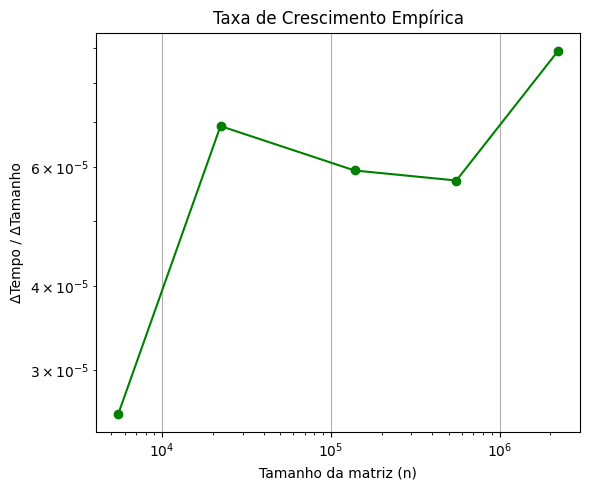

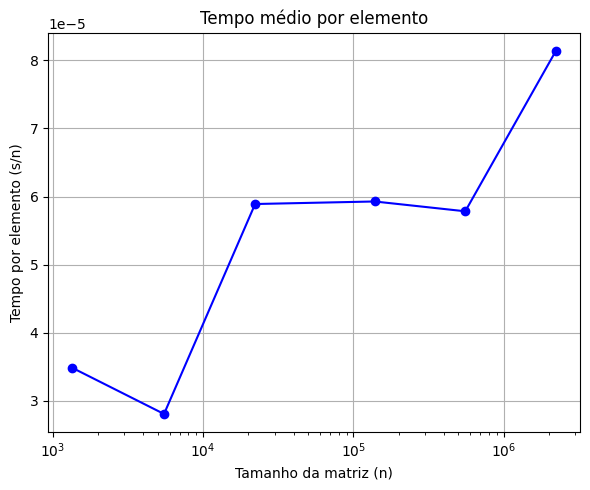

[0.047031402587890625, 0.15436267852783203, 1.3075156211853027, 8.208999872207642, 32.095503091812134, 180.8049178123474]


In [ ]:
import time
arquives = ["case0", "case1", "case2", "case3", "case4", "case5"]
arqweith = [1350,5500,22200,138500,555000,2222000]
tempo = []
for arquivo in arquives:
  atual = arquivo + ".map"
  inicio = time.time()
  teste(atual,'r')
  fim = time.time()
  tempo.append(fim - inicio)
plotBarra(arquives,tempo)
plotCurvaT(arqweith,tempo)
plot_taxa_crescimento(arqweith,tempo)
plot_tempo_por_elemento(arqweith,tempo)
print(tempo)


User Interface para testes

*desenhar apenas funciona com os casos 0 e 1. Os outros exigem mais memoria RAM do que o colab fornece
Voce quer testar(1) ou desenhar(2) o grafo? 2
escolha um caso de 0 até 5: 0


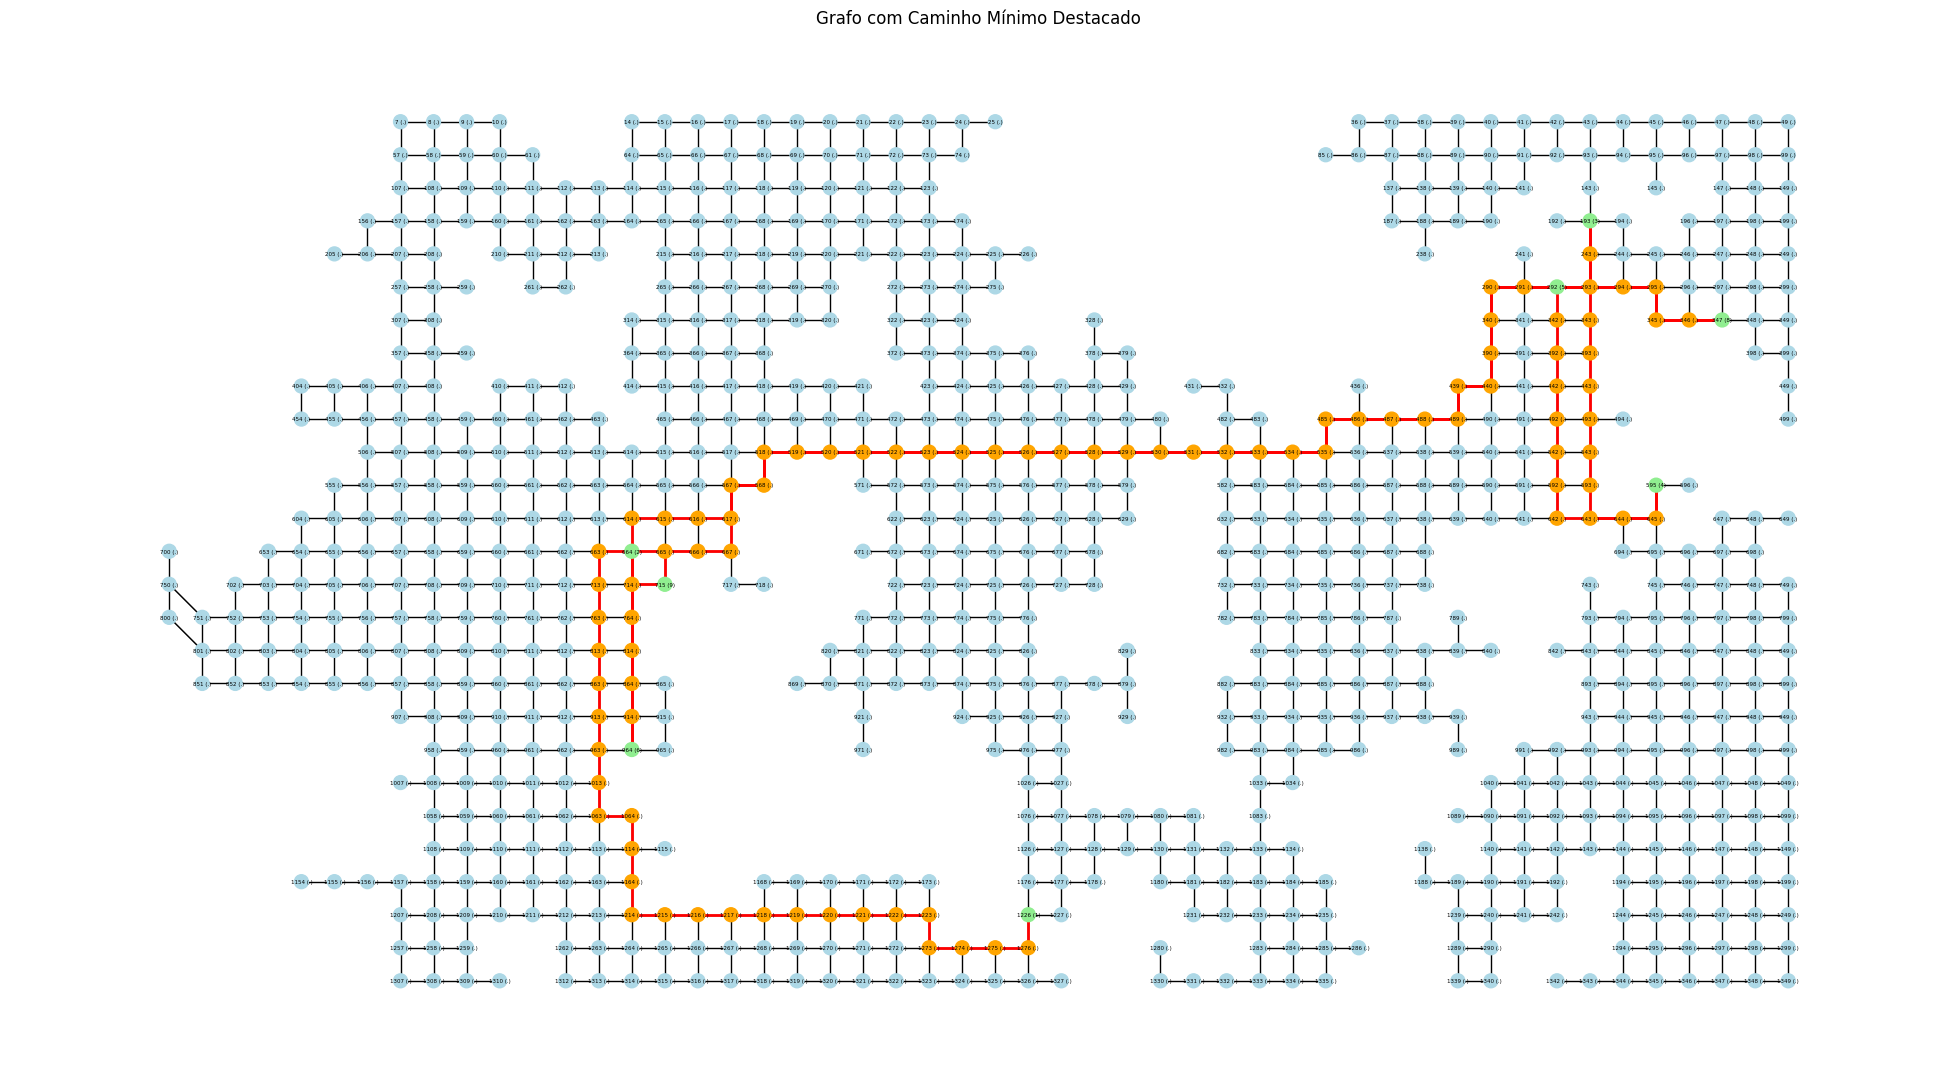

Tempo de execução: 14.11 segundos


In [ ]:
import time
arquives = ["case0.map", "case1.map", "case2.map", "case3.map", "case4.map", "case5.map"]
stop = True
while(stop):
  print("*desenhar apenas funciona com os casos 0 e 1. Os outros exigem mais memoria RAM do que o colab fornece")
  escolha = input("Voce quer testar(1) ou desenhar(2) o grafo? ")
  if(escolha=="1"):
    while(stop):
      inicio = time.time()
      teste(arquives[int(input("escolha um caso de 0 até 5: "))],'p')
      fim = time.time()
      print(f"Tempo de execução: {fim - inicio:.2f} segundos")
      if(input("Voce quer testar algum outro caso? (S/N) ").upper()=="N"):
        stop = False

  else:
    inicio = time.time()
    desenho(arquives[int(input("escolha um caso de 0 até 5: "))])
    fim = time.time()
    print(f"Tempo de execução: {fim - inicio:.2f} segundos")
    stop = False



